In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Task (a) (i): Load and examine the dataset structure ---
try:
    df = pd.read_csv('Country-data.csv')
except FileNotFoundError:
    print("Error: 'Country-data.csv' not found. Please upload the file or check the path.")


In [26]:
print("--- First 5 rows of the dataset ---")
print(df.head())
print("\n")

print("--- Dataset Info ---")
df.info()
print("\n")


print("--- Descriptive Statistics ---")
print(df.describe())
print("\n")


print("--- Missing Values ---")
print(df.isnull().sum())
print("\n")


--- First 5 rows of the dataset ---
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child

In [27]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [28]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


--- Feature Histograms ---


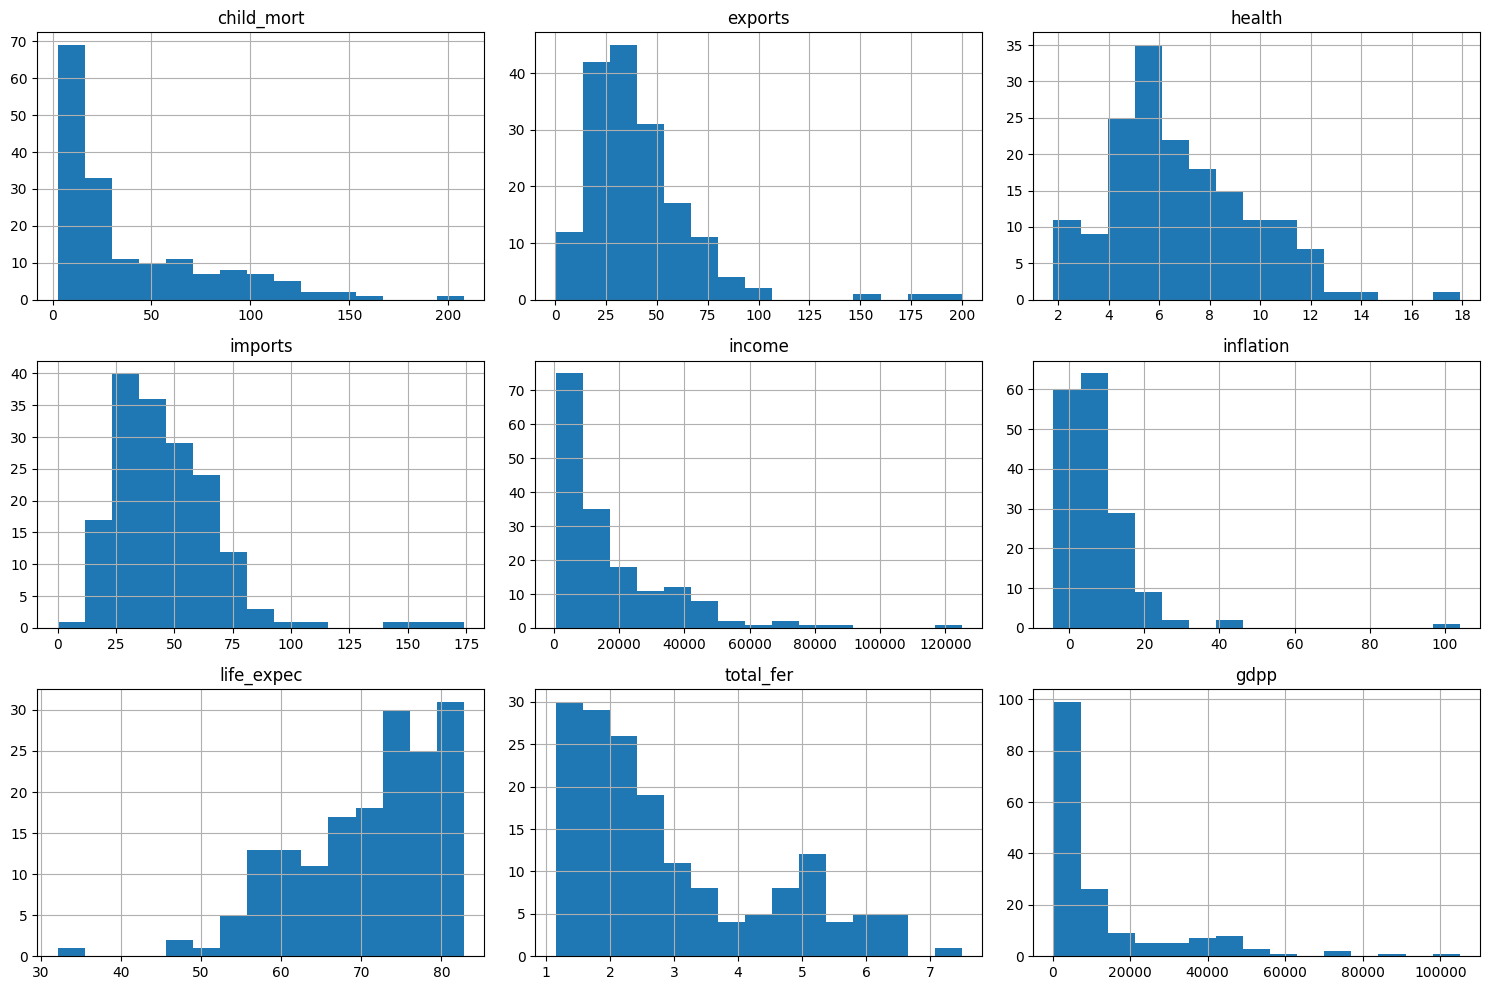


--- Scaled Features Head ---
   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  

--- Scaled Features Mean (approx 0) ---
child_mort   -3.722904e-17
exports       2.127373e-16
health        5.504579e-16
imports       2.765585e-16
income       -7.977650e-17
inflation    -1.063687e-17
life_expec    3.696311e-16
total_fer     3.044803e-16
gdpp          5.850277e-17
dtype: float64

--- Scaled Features Std Dev (approx 1) ---
child_mort    1.003008
exports       1.003008
health        1.003008
imports       1.003008
income        1.003008
inflation     1.003008
life_expec    1.003008
total_fer     1.003008
gdpp          1.003008

In [29]:
# Define features for clustering
feature_columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']

available_features = [col for col in feature_columns if col in df.columns]
if not available_features:
    print("Error: No specified features found in the dataset. Exiting.")
    exit()
df_features = df[available_features].copy()
countries = df['country'] if 'country' in df.columns else pd.Series([f"Country_{i}" for i in range(len(df_features))])


# (a) (ii) Plot histograms for each individual feature
print("\n--- Feature Histograms ---")
df_features.hist(bins=15, figsize=(15, 10), layout=(-1, 3))
plt.tight_layout()
plt.show()

# (a) (iii) Perform feature scaling/standardization
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled_array, columns=df_features.columns)

print("\n--- Scaled Features Head ---")
print(df_scaled.head(3))
print("\n--- Scaled Features Mean (approx 0) ---")
print(df_scaled.mean())
print("\n--- Scaled Features Std Dev (approx 1) ---")
print(df_scaled.std())

In [30]:
k = 4
max_iterations = 100
num_initializations = 5

best_inertia = float('inf')
best_labels = None
best_centroids = None
X = df_scaled.values # Convert to numpy array for K-means

print(f"\n--- Running K-means (k={k}, {num_initializations} initializations) ---")

for init in range(num_initializations):
    # (b) (i) Initialize centroids randomly
    random_indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroids = X[random_indices, :]

    current_inertia = 0

    for iteration in range(max_iterations):
        # Assign countries to the nearest centroid using Euclidean distance
        distances = np.sqrt(((X[:, np.newaxis, :] - centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)

        # Update centroids by computing the mean of assigned countries
        new_centroids = np.array([X[labels == j].mean(axis=0) if (labels == j).any() else centroids[j] for j in range(k)])

        # (b) (iii) Convergence criteria: if centroids do not change
        if np.allclose(centroids, new_centroids, atol=1e-4):
            # print(f"Init {init+1}: Converged at iteration {iteration+1}.")
            break
        centroids = new_centroids

    # Calculate inertia for this initialization
    current_inertia = 0
    for j in range(k):
        cluster_points = X[labels == j]
        if len(cluster_points) > 0:
            current_inertia += np.sum((cluster_points - centroids[j, :])**2)

    # print(f"Init {init+1}: Final Inertia = {current_inertia:.2f}")

    if current_inertia < best_inertia:
        best_inertia = current_inertia
        best_labels = labels
        best_centroids = centroids
        # print(f"Init {init+1}: New best inertia found.")

print(f"\n--- Best K-means Run ---")
print(f"Best Inertia (Sum of Squared Errors): {best_inertia:.2f}")

# Add cluster labels to DataFrames
if best_labels is not None:
    df_scaled['cluster'] = best_labels
    if 'df_features' in globals() and not df_features.empty:
        df_features['cluster'] = best_labels
else:
    print("Error: K-means did not produce valid labels.")


print("\n--- Convergence Criteria Explanation ---")
print("""
K-means converges when:
1. Centroids' positions stabilize: The change in centroid positions between iterations is negligible (checked using `np.allclose`).
2. Maximum iterations reached: The algorithm stops after `max_iterations` (100) to prevent infinite loops if convergence is slow or not achieved.
The run with the lowest inertia (sum of squared distances from points to their assigned centroids) is chosen from multiple initializations.
""")



--- Running K-means (k=4, 5 initializations) ---

--- Best K-means Run ---
Best Inertia (Sum of Squared Errors): 700.52

--- Convergence Criteria Explanation ---

K-means converges when:
1. Centroids' positions stabilize: The change in centroid positions between iterations is negligible (checked using `np.allclose`).
2. Maximum iterations reached: The algorithm stops after `max_iterations` (100) to prevent infinite loops if convergence is slow or not achieved.
The run with the lowest inertia (sum of squared distances from points to their assigned centroids) is chosen from multiple initializations.




--- 2D Scatter Plots (Color-coded by Cluster) ---


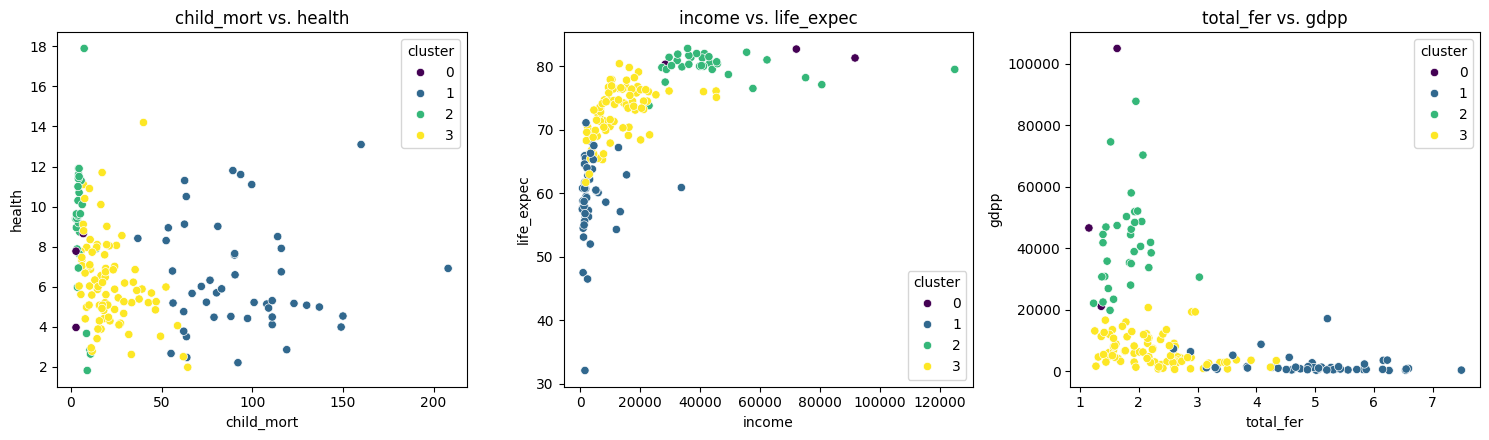



--- Cluster Analysis ---

Number of countries per cluster:
cluster
0     3
1    47
2    32
3    85
Name: count, dtype: int64

Average values of indicators per cluster:
         child_mort     exports    health     imports        income  \
cluster                                                               
0          4.133333  176.000000  6.793333  156.666667  64033.333333   
1         92.961702   29.151277  6.388511   42.323404   3942.404255   
2          5.181250   46.118750  9.088437   40.584375  44021.875000   
3         21.690588   41.073988  6.197059   47.914893  12671.411765   

         inflation  life_expec  total_fer          gdpp  
cluster                                                  
0         2.468000   81.433333   1.380000  57566.666667  
1        12.019681   59.187234   5.008085   1922.382979  
2         2.513844   80.081250   1.788437  42118.750000  
3         7.609341   72.871765   2.300706   6519.552941  

Characteristic features of each cluster (example):

Cl

In [33]:
# (c) (i) Create 2D scatter plots (using original feature values)
print("\n--- 2D Scatter Plots (Color-coded by Cluster) ---")
plot_pairs = [
    ('child_mort', 'health'),
    ('income', 'life_expec'),
    ('total_fer', 'gdpp')
]

# Check if all features for plotting are available
valid_plot_pairs = []
for p1, p2 in plot_pairs:
    if p1 in df_features.columns and p2 in df_features.columns:
        valid_plot_pairs.append((p1, p2))
    else:
        print(f"Warning: Features for plot '{p1}' vs '{p2}' not found. Skipping.")

if not valid_plot_pairs:
    print("Error: No valid feature pairs for plotting.")
else:
    num_valid_plots = len(valid_plot_pairs)
    fig, axes = plt.subplots(1, num_valid_plots, figsize=(num_valid_plots * 5, 4.5), squeeze=False)
    axes = axes.flatten()

    for i, (feat1, feat2) in enumerate(valid_plot_pairs):
        sns.scatterplot(x=df_features[feat1], y=df_features[feat2], hue=df_features['cluster'],
                        palette='viridis', ax=axes[i], legend='full')
        axes[i].set_title(f'{feat1} vs. {feat2}')
        axes[i].set_xlabel(feat1)
        axes[i].set_ylabel(feat2)
    plt.tight_layout()
    plt.show()


# (c) (ii) For each cluster, analyze and report
print("\n\n--- Cluster Analysis ---")

# Ensure 'cluster' column exists for grouping
if 'cluster' in df_features.columns:
    # Numerical columns for averaging (excluding 'country' and 'cluster' itself)
    numerical_cols = df_features.select_dtypes(include=np.number).columns.tolist()
    if 'cluster' in numerical_cols: # should not be averaged
        numerical_cols.remove('cluster')

    if not numerical_cols:
        print("Error: No numerical columns found for averaging in df_features.")
    else:
        # Number of countries per cluster
        cluster_counts = df_features['cluster'].value_counts().sort_index()
        print("\nNumber of countries per cluster:")
        print(cluster_counts)

        # Average values of key indicators per cluster
        cluster_means = df_features.groupby('cluster')[numerical_cols].mean()
        print("\nAverage values of indicators per cluster:")
        print(cluster_means)

        # Characteristic features of the cluster (brief qualitative description)
        print("\nCharacteristic features of each cluster (example):")
        overall_mean_indicators = df_features[numerical_cols].mean()
        for cluster_id in cluster_means.index:
            print(f"\nCluster {cluster_id} (Countries: {cluster_counts[cluster_id]}):")
            for feature in numerical_cols:
                val = cluster_means.loc[cluster_id, feature]
                overall_val = overall_mean_indicators[feature]
                if val > overall_val * 1.25: # 25% above average
                    print(f"  - Significantly HIGH {feature}: {val:.2f} (Overall avg: {overall_val:.2f})")
                elif val < overall_val * 0.75: # 25% below average
                    print(f"  - Significantly LOW {feature}: {val:.2f} (Overall avg: {overall_val:.2f})")

else:
    print("Error: 'cluster' column not found in df_features. Cannot perform cluster analysis.")


if 'cluster' in df_features.columns and 'countries' in globals() and len(countries) == len(df_features):
    df_with_countries = pd.concat([countries.reset_index(drop=True), df_features.reset_index(drop=True)], axis=1)
    if 'country' not in df_with_countries.columns and 0 in df_with_countries.columns:
        df_with_countries = df_with_countries.rename(columns={0: 'country'})

    if 'country' in df_with_countries.columns:
        print("\n--- Countries per Cluster (first 5) ---")
        for cluster_id in sorted(df_with_countries['cluster'].unique()):
            cluster_countries = df_with_countries[df_with_countries['cluster'] == cluster_id]['country'].tolist()
            print(f"Cluster {cluster_id}: {', '.join(cluster_countries[:5])}{'...' if len(cluster_countries) > 5 else ''}")
    else:
        print("Warning: Could not identify country names for cluster listing.")



In [38]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Question 2:

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Define features for PCA
feature_columns = ['child_mort', 'health', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
available_features = [col for col in feature_columns if col in df.columns]
if not available_features:
    print("Error: No specified features found in the dataset. Exiting.")
    exit() # Or handle error appropriately

df_features = df[available_features].copy()
countries = df['country'] if 'country' in df.columns else pd.Series([f"Country_{i}" for i in range(len(df_features))])

# Standardize the data
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled_array, columns=df_features.columns)

print("--- Scaled Data Head ---")
print(df_scaled.head(3))

# --- Task (a): Principal Component Analysis ---

# (a) (i) Implement PCA on the standardized dataset
covariance_matrix = np.cov(df_scaled.T)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)


sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("\n--- Sorted Eigenvalues ---")
print(sorted_eigenvalues)

# (a) (ii) Compute the explained variance ratio for each component
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("\n--- Explained Variance Ratio per Component ---")
print(explained_variance_ratio)

cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\n--- Cumulative Explained Variance ---")
print(cumulative_explained_variance)

# (a) (iii) Determine the minimum number of principal components needed to explain at least 80% of the variability
min_components_80_var = np.where(cumulative_explained_variance >= 0.80)[0][0] + 1
print(f"\nMinimum number of components to explain at least 80% variability: {min_components_80_var}")


pca_data_full = df_scaled.dot(sorted_eigenvectors)
pca_data_full.columns = [f'PC{i+1}' for i in range(len(df_scaled.columns))]

print("\n--- PCA Transformed Data (first 3 rows, all PCs) ---")
print(pca_data_full.head(3))

# Store labels from K-means on original high-dimensional scaled data for later comparison (Task c.iv)
kmeans_original_dim = KMeans(n_clusters=4, random_state=42, n_init='auto')
labels_original_dim = kmeans_original_dim.fit_predict(df_scaled)
df_features['cluster_original_dim'] = labels_original_dim # Add to original unscaled features df for context
pca_data_full['cluster_original_dim'] = labels_original_dim # Also add to pca_data_full for easy access
print(f"\nK-means labels on original {df_scaled.shape[1]}-dim scaled data stored ('cluster_original_dim').")


--- Scaled Data Head ---
   child_mort    health    income  inflation  life_expec  total_fer      gdpp
0    1.291532  0.279088 -0.808245   0.157336   -1.619092   1.902882 -0.679180
1   -0.538949 -0.097016 -0.375369  -0.312347    0.647866  -0.859973 -0.485623
2   -0.272833 -0.966073 -0.220844   0.789274    0.670423  -0.038404 -0.465376

--- Sorted Eigenvalues ---
[3.86286999 1.08494913 0.99866771 0.70733799 0.22953052 0.0901935
 0.06861985]

--- Explained Variance Ratio per Component ---
[0.54853415 0.15406463 0.14181252 0.1004432  0.03259373 0.01280763
 0.00974414]

--- Cumulative Explained Variance ---
[0.54853415 0.70259878 0.8444113  0.94485451 0.97744823 0.99025586
 1.        ]

Minimum number of components to explain at least 80% variability: 3

--- PCA Transformed Data (first 3 rows, all PCs) ---
        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -2.724469  0.758350 -0.926157 -0.136727 -0.275211 -0.413499 -0.081573
1  0.603580  0.107175  1.197486  0.228670 


--- Data reduced to 2 Principal Components (PC1, PC2) ---
        PC1       PC2
0 -2.724469  0.758350
1  0.603580  0.107175
2 -0.166976 -1.198694


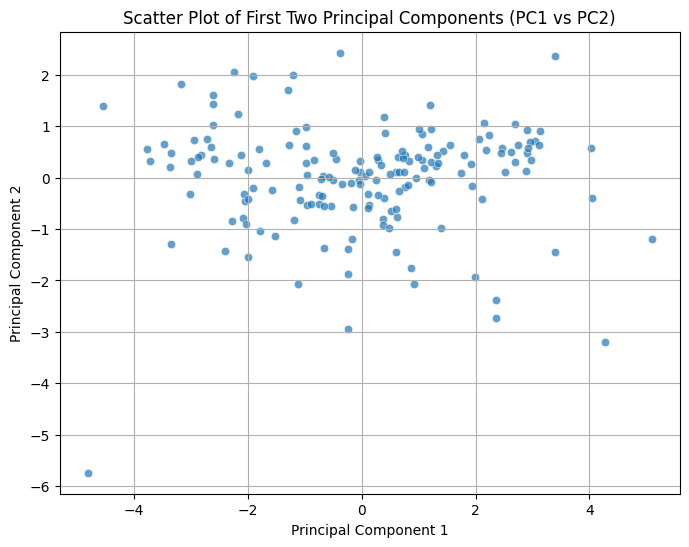


--- K-means clustering on 2D PCA data (k=4) ---
        PC1       PC2  cluster_2d_pca
0 -2.724469  0.758350               2
1  0.603580  0.107175               0
2 -0.166976 -1.198694               0


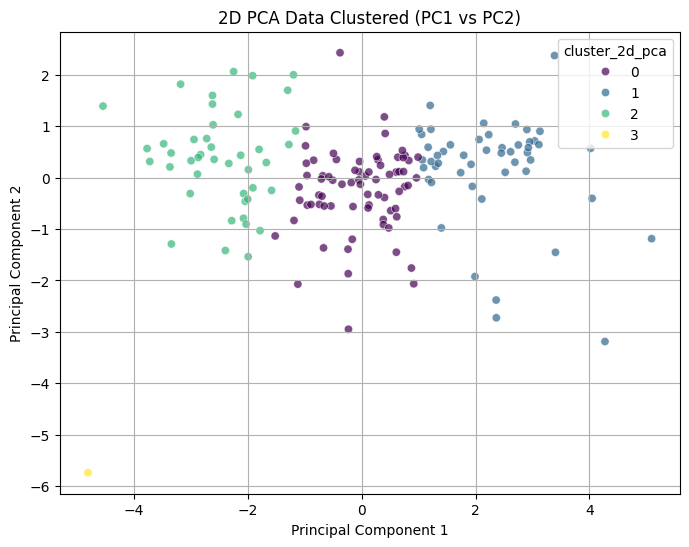

In [36]:

# --- Task (b): 2D Analysis and Visualization ---

# Select the first two principal components
pca_data_2d = pca_data_full[['PC1', 'PC2']].copy()
print("\n--- Data reduced to 2 Principal Components (PC1, PC2) ---")
print(pca_data_2d.head(3))

# (b) (i) Create scatter plots of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_data_2d, alpha=0.7)
plt.title('Scatter Plot of First Two Principal Components (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# (b) (ii) Apply k-means clustering (k = 4) on the 2D reduced data
kmeans_2d = KMeans(n_clusters=4, random_state=42, n_init='auto')
pca_data_2d['cluster_2d_pca'] = kmeans_2d.fit_predict(pca_data_2d[['PC1', 'PC2']])
# Also add these labels to df_features for later comparison
if 'df_features' in globals() and not df_features.empty:
    df_features['cluster_2d_pca'] = pca_data_2d['cluster_2d_pca']
else:
    print("Warning: df_features not available to store 2D PCA cluster labels.")


print("\n--- K-means clustering on 2D PCA data (k=4) ---")
print(pca_data_2d.head(3))

# (b) (iii) Show a 2D plot for the dimension-reduced data, colour-coded by cluster assignment
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_2d_pca', palette='viridis', data=pca_data_2d, alpha=0.7, legend='full')
plt.title('2D PCA Data Clustered (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


--- Data reduced to 3 Principal Components (PC1, PC2, PC3) ---
        PC1       PC2       PC3
0 -2.724469  0.758350 -0.926157
1  0.603580  0.107175  1.197486
2 -0.166976 -1.198694  0.756575

--- Pairwise Scatter Plots of First Three PCs ---


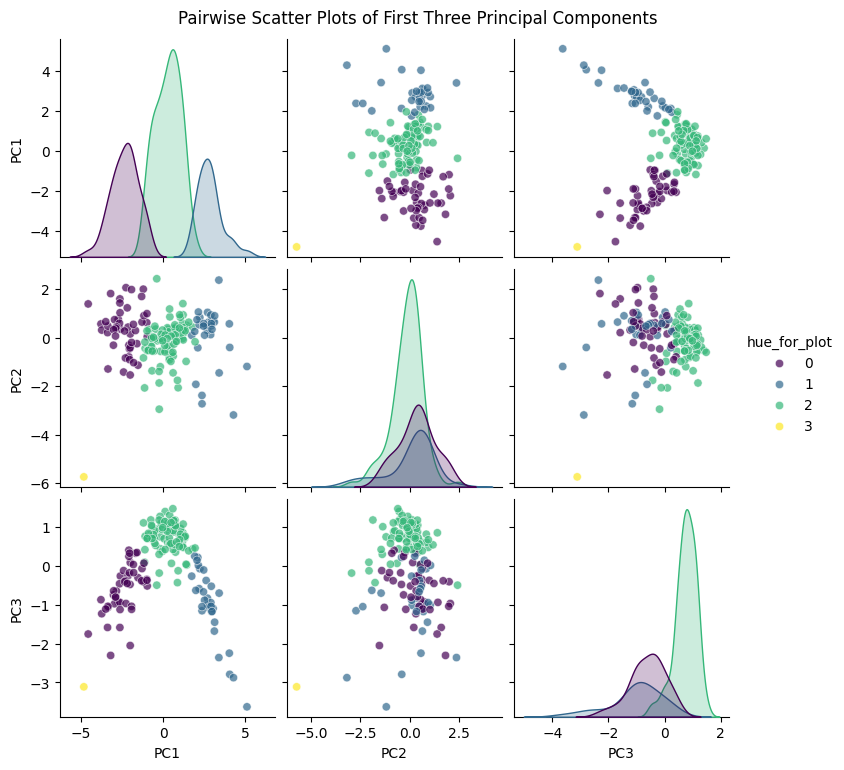


--- K-means clustering on 3D PCA data (k=4) ---
        PC1       PC2       PC3  cluster_3d_pca
0 -2.724469  0.758350 -0.926157               2
1  0.603580  0.107175  1.197486               0
2 -0.166976 -1.198694  0.756575               0

--- Pairwise Scatter Plots of 3D PCA Data (Clustered) ---


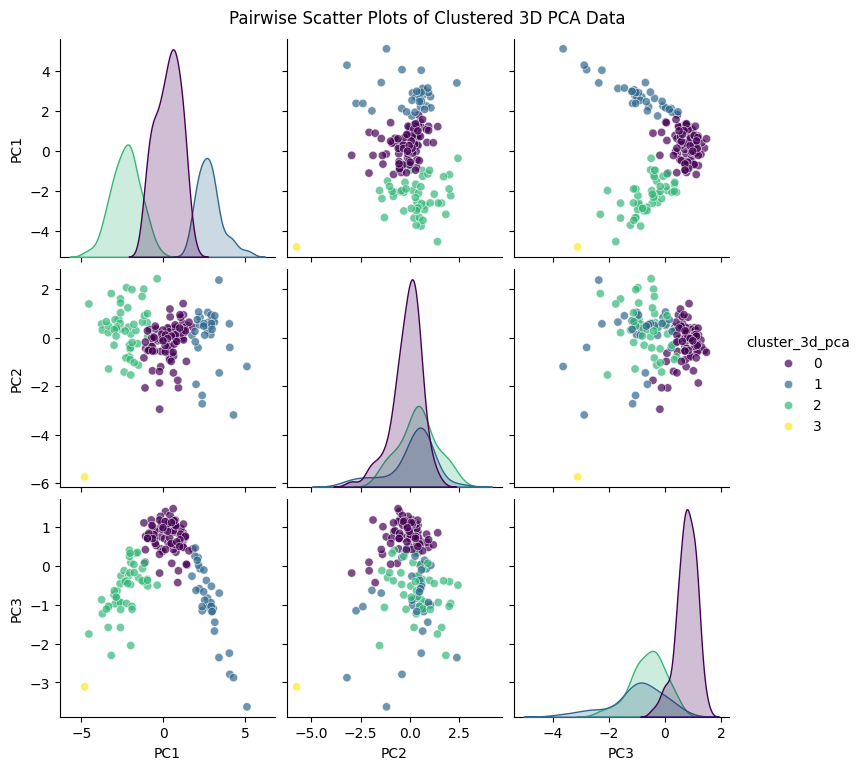



--- Comparison of Clustering Results ---

Cluster assignments across different methods (first 10 countries):
   country_idx  cluster_original_dim  cluster_2d_pca  cluster_3d_pca
0            0                     0               2               2
1            1                     2               0               0
2            2                     2               0               0
3            3                     0               2               2
4            4                     2               0               0
5            5                     2               0               0
6            6                     2               0               0
7            7                     1               1               1
8            8                     1               1               1
9            9                     2               0               0

Crosstab: Original Dimensions vs. 2D PCA Clustering
cluster_2d_pca         0   1   2  3
cluster_original_dim               
0    

In [41]:
# --- Task (c): 3D Analysis and Comparison ---

# Select the first three principal components
if len(pca_data_full.columns) >=3: # Ensure at least 3 PCs exist
    pca_data_3d = pca_data_full[['PC1', 'PC2', 'PC3']].copy()
    print("\n--- Data reduced to 3 Principal Components (PC1, PC2, PC3) ---")
    print(pca_data_3d.head(3))

    # (c) (i) Create pairwise scatter plots of the first three principal components
    print("\n--- Pairwise Scatter Plots of First Three PCs ---")
    if not pca_data_3d.empty:
        # Add original dimension cluster for hue if available, otherwise plot without hue
        temp_plot_df = pca_data_3d.copy()
        if 'cluster_original_dim' in pca_data_full.columns: # Use original dim cluster for initial view
             temp_plot_df['hue_for_plot'] = pca_data_full['cluster_original_dim']
             sns.pairplot(temp_plot_df, vars=['PC1', 'PC2', 'PC3'], hue='hue_for_plot', palette='viridis', plot_kws={'alpha': 0.7})
        else:
             sns.pairplot(temp_plot_df, vars=['PC1', 'PC2', 'PC3'], plot_kws={'alpha': 0.7})
        plt.suptitle('Pairwise Scatter Plots of First Three Principal Components', y=1.02)
        plt.show()
    else:
        print("Not enough PCs for 3D pairwise plots or pca_data_3d is empty.")


    # (c) (ii) Apply k-means clustering (k = 4) on the 3D reduced data
    kmeans_3d = KMeans(n_clusters=4, random_state=42, n_init='auto')
    pca_data_3d['cluster_3d_pca'] = kmeans_3d.fit_predict(pca_data_3d[['PC1', 'PC2', 'PC3']])
    # Also add these labels to df_features for later comparison
    if 'df_features' in globals() and not df_features.empty:
        df_features['cluster_3d_pca'] = pca_data_3d['cluster_3d_pca']
    else:
        print("Warning: df_features not available to store 3D PCA cluster labels.")


    print("\n--- K-means clustering on 3D PCA data (k=4) ---")
    print(pca_data_3d.head(3))

    # (c) (iii) Show pairwise 2D plots for the dimension-reduced data, colour-coded by cluster assignment
    print("\n--- Pairwise Scatter Plots of 3D PCA Data (Clustered) ---")
    if not pca_data_3d.empty and 'cluster_3d_pca' in pca_data_3d.columns:
        sns.pairplot(pca_data_3d, vars=['PC1', 'PC2', 'PC3'], hue='cluster_3d_pca', palette='viridis', plot_kws={'alpha': 0.7})
        plt.suptitle('Pairwise Scatter Plots of Clustered 3D PCA Data', y=1.02)
        plt.show()
    else:
        print("Not enough PCs for 3D clustered plots or pca_data_3d is empty/missing clusters.")

else:
    print("Error: Less than 3 Principal Components available. Skipping 3D analysis.")
    # Create dummy pca_data_3d and df_features['cluster_3d_pca'] if they don't exist to allow comparison part to run
    if 'pca_data_3d' not in globals():
        pca_data_3d = pd.DataFrame(columns=['PC1', 'PC2', 'PC3', 'cluster_3d_pca']) # empty
    if 'df_features' in globals() and 'cluster_3d_pca' not in df_features.columns:
        df_features['cluster_3d_pca'] = np.nan # placeholder


# (c) (iv) Compare clustering results
print("\n\n--- Comparison of Clustering Results ---")
# Ensure all cluster label columns exist in df_features
required_cluster_cols = ['cluster_original_dim', 'cluster_2d_pca', 'cluster_3d_pca']
missing_cols_for_comparison = [col for col in required_cluster_cols if col not in df_features.columns]

if missing_cols_for_comparison:
    print(f"Warning: Missing cluster columns for full comparison: {missing_cols_for_comparison}")
    print("Showing comparison for available clusterings.")
    # Filter to available columns for comparison
    available_cluster_cols = [col for col in required_cluster_cols if col in df_features.columns]
else:
    available_cluster_cols = required_cluster_cols

if not available_cluster_cols:
    print("No cluster results available for comparison.")
else:
    comparison_df = df_features[available_cluster_cols].copy()
    if 'country' not in comparison_df.columns:
        comparison_df.insert(0, 'country_idx', comparison_df.index)


    print("\nCluster assignments across different methods (first 10 countries):")
    print(comparison_df.head(10))

    if 'cluster_original_dim' in available_cluster_cols and 'cluster_2d_pca' in available_cluster_cols:
        print("\nCrosstab: Original Dimensions vs. 2D PCA Clustering")
        print(pd.crosstab(comparison_df['cluster_original_dim'], comparison_df['cluster_2d_pca']))

    if 'cluster_original_dim' in available_cluster_cols and 'cluster_3d_pca' in available_cluster_cols:
        print("\nCrosstab: Original Dimensions vs. 3D PCA Clustering")
        print(pd.crosstab(comparison_df['cluster_original_dim'], comparison_df['cluster_3d_pca']))

    if 'cluster_2d_pca' in available_cluster_cols and 'cluster_3d_pca' in available_cluster_cols:
        print("\nCrosstab: 2D PCA vs. 3D PCA Clustering")
        print(pd.crosstab(comparison_df['cluster_2d_pca'], comparison_df['cluster_3d_pca']))

Discussion of Practical Implications for Development Aid Allocation ---
- PCA helps identify the most significant underlying factors (principal components) that differentiate countries based on their socio-economic and health indicators. This reduces complexity.
- Clustering countries (either on original data or PCA-reduced data) groups them based on similarity. These groups can represent different levels or types of development needs.
- **Targeted Aid**: Countries in clusters with, for example, high 'child_mort' and low 'gdpp' (as might be revealed by examining cluster centroids on original features) would be high-priority candidates for health and economic aid.
- **Resource Allocation**: If 2D or 3D PCA provides meaningful clusters, the UNDP can visualize and explain these groupings more easily to stakeholders, justifying resource allocation strategies. For instance, PC1 might represent overall economic development, and PC2 might represent health system strength.
- **Efficiency**: Using PCA can make the clustering process more efficient and potentially more robust by removing noise and multicollinearity present in the original high-dimensional data.
- **Monitoring**: The principal components themselves can be monitored over time to track a country's development trajectory relative to others.
- **Differences in Clustering**: If clustering on 2D PCA data differs significantly from 3D or original data, it implies that the first two components might not capture enough variance to form stable, representative groups for all purposes. The choice of dimensionality (2D, 3D, or more PCs determined by variance explained) depends on the trade-off between simplicity and information loss. The 80% variance rule helps guide this.

Question 3

In [43]:
import numpy as np
from scipy.stats import norm

# Data points
data = np.array([-0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53,
                 0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22])

# Number of components (k=2 for two Gaussians)
k = 2
n_samples = len(data)

# Initialize parameters
# A simple initialization: split data into two halves and calculate initial params
initial_mu = np.array([np.mean(data[:n_samples//2]), np.mean(data[n_samples//2:])])
initial_sigma2 = np.array([np.var(data[:n_samples//2]), np.var(data[n_samples//2:])])
initial_pi = np.array([0.5, 0.5])

# Add a small value to initial variances to avoid division by zero or very small values
initial_sigma2 += 1e-6

mu = initial_mu
sigma2 = initial_sigma2
pi = initial_pi

# EM Algorithm
n_iterations = 100
tolerance = 1e-4
log_likelihood = -np.inf

for iteration in range(n_iterations):
    # E-step: Calculate responsibilities
    gamma = np.zeros((n_samples, k))
    for i in range(n_samples):
        denominator = 0
        for j in range(k):
            denominator += pi[j] * norm.pdf(data[i], mu[j], np.sqrt(sigma2[j]))
        for j in range(k):
            numerator = pi[j] * norm.pdf(data[i], mu[j], np.sqrt(sigma2[j]))
            gamma[i, j] = numerator / denominator

    # M-step: Update parameters
    mu_new = np.zeros(k)
    sigma2_new = np.zeros(k)
    pi_new = np.zeros(k)

    for j in range(k):
        Nk = np.sum(gamma[:, j])
        mu_new[j] = np.sum(gamma[:, j] * data) / Nk
        sigma2_new[j] = np.sum(gamma[:, j] * (data - mu_new[j])**2) / Nk
        pi_new[j] = Nk / n_samples

    # Check for convergence (using log-likelihood)
    current_log_likelihood = np.sum(np.log(np.sum([pi[j] * norm.pdf(data[i], mu[j], np.sqrt(sigma2[j])) for j in range(k)], axis=0)) for i in range(n_samples))

    if np.abs(current_log_likelihood - log_likelihood) < tolerance:
        print(f"Convergence reached at iteration {iteration}")
        break

    log_likelihood = current_log_likelihood
    mu = mu_new
    sigma2 = sigma2_new
    pi = pi_new
    sigma2 += 1e-6


print("\nEstimated Parameters:")
for j in range(k):
    print(f"Gaussian {j+1}:")
    print(f"  Mean (μ): {mu[j]:.4f}")
    print(f"  Variance (σ²): {sigma2[j]:.4f}")
    print(f"  Mixing Coefficient (π): {pi[j]:.4f}")

<ipython-input-43-6a06910f5582>:53: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  current_log_likelihood = np.sum(np.log(np.sum([pi[j] * norm.pdf(data[i], mu[j], np.sqrt(sigma2[j])) for j in range(k)], axis=0)) for i in range(n_samples))


Convergence reached at iteration 64

Estimated Parameters:
Gaussian 1:
  Mean (μ): 1.0815
  Variance (σ²): 0.8087
  Mixing Coefficient (π): 0.5541
Gaussian 2:
  Mean (μ): 4.6540
  Variance (σ²): 0.8217
  Mixing Coefficient (π): 0.4459
